In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv")


In [18]:
print("first five rows: ")
print(df.head()),

print("shape of the dataset: ")
print(df.shape),

print("datatype: ")
print(df.dtypes)

first five rows: 
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y             

In [19]:
# Assuming your DataFrame is named df
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [37]:
columns = df.columns

for column in columns:
    missing_values = df[column].isnull().sum()
    print(f"Missing values in {column}: {missing_values}")

Missing values in person_age: 0
Missing values in person_income: 0
Missing values in person_home_ownership: 0
Missing values in person_emp_length: 895
Missing values in loan_intent: 0
Missing values in loan_grade: 0
Missing values in loan_amnt: 0
Missing values in loan_int_rate: 3116
Missing values in loan_status: 0
Missing values in loan_percent_income: 0
Missing values in cb_person_default_on_file: 0
Missing values in cb_person_cred_hist_length: 0


In [39]:
# For 'person_emp_length'
df.loc[:, 'person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].mean())

# For 'loan_int_rate'
df.loc[:, 'loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].mean())


In [40]:
for column in columns:
    missing_values = df[column].isnull().sum()
    print(f"Missing values in {column}: {missing_values}")

Missing values in person_age: 0
Missing values in person_income: 0
Missing values in person_home_ownership: 0
Missing values in person_emp_length: 0
Missing values in loan_intent: 0
Missing values in loan_grade: 0
Missing values in loan_amnt: 0
Missing values in loan_int_rate: 0
Missing values in loan_status: 0
Missing values in loan_percent_income: 0
Missing values in cb_person_default_on_file: 0
Missing values in cb_person_cred_hist_length: 0


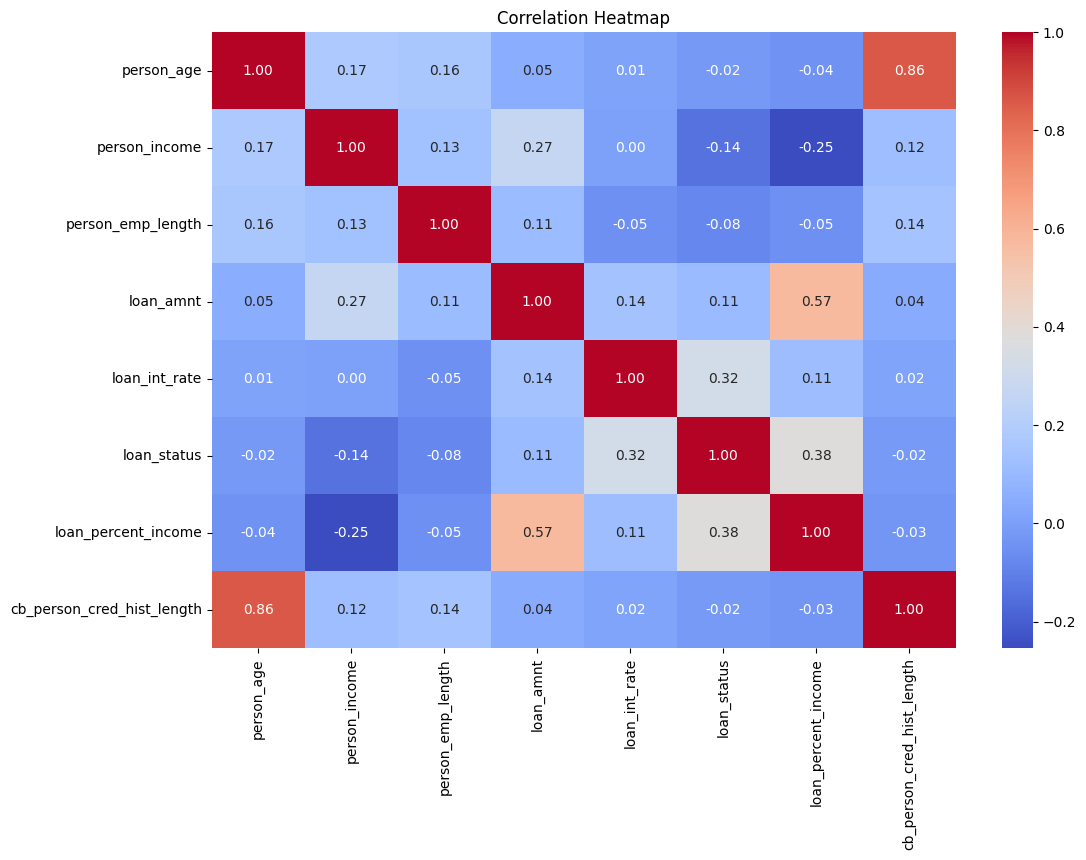

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df_encoded = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])

# Select only numerical columns
numerical_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_encoded[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Assuming 'loan_status' is the target variable
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example machine learning model (Random Forest Classifier)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.96      0.72      0.83      1445

    accuracy                           0.93      6517
   macro avg       0.95      0.86      0.89      6517
weighted avg       0.93      0.93      0.93      6517



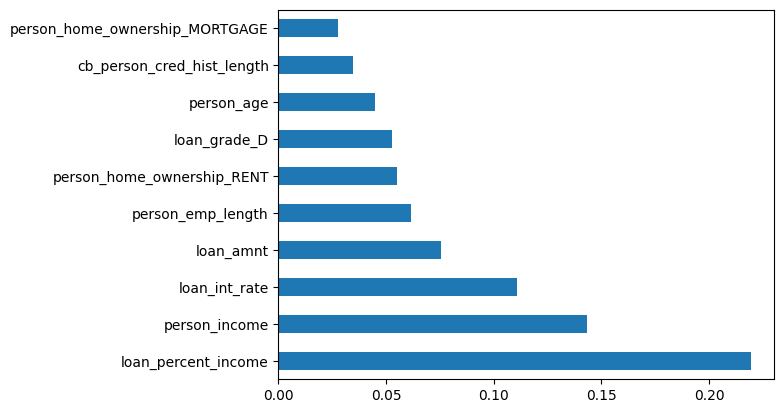

In [46]:
# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()


In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Example Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print("Gradient Boosting Accuracy:", gb_accuracy)

# Example Support Vector Machine Classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("SVM Accuracy:", svm_accuracy)


Gradient Boosting Accuracy: 0.925425809421513
SVM Accuracy: 0.8020561608101887


# for now we will go with random forest 

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the hyperparameter search space
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['sqrt', 'log2', None],  # 'auto' is deprecated, use 'sqrt' instead
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Create a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the random search to your data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 153}

Model Evaluation:
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.97      0.72      0.83      1445

    accuracy                           0.93      6517
   macro avg       0.95      0.86      0.89      6517
weighted avg       0.94      0.93      0.93      6517



In [56]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Define the hyperparameter search space
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Define the objective function for Optuna
def objective(trial):
    model = RandomForestClassifier(
        n_estimators=trial.suggest_int('n_estimators', 10, 200),
        max_features=trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None]),
        max_depth=trial.suggest_categorical('max_depth', [None, 10, 20, 30, 40, 50]),
        min_samples_split=trial.suggest_int('min_samples_split', 2, 20),
        min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 20),
        bootstrap=trial.suggest_categorical('bootstrap', [True, False]),
        criterion=trial.suggest_categorical('criterion', ['gini', 'entropy'])
    )

    # Use cross-validation to estimate performance
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1).mean()

    return score

# Perform Bayesian optimization with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, n_jobs=-1)

# Get the best parameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Use the best model
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))



[I 2024-02-05 22:46:56,694] A new study created in memory with name: no-name-49ba896b-ef2c-4925-9c45-9fc5e7834ca3
[I 2024-02-05 22:47:27,545] Trial 3 finished with value: 0.9285988052479345 and parameters: {'n_estimators': 119, 'max_features': 'sqrt', 'max_depth': 10, 'min_samples_split': 18, 'min_samples_leaf': 5, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 3 with value: 0.9285988052479345.
[I 2024-02-05 22:47:40,766] Trial 0 finished with value: 0.9249155728071639 and parameters: {'n_estimators': 31, 'max_features': None, 'max_depth': 10, 'min_samples_split': 14, 'min_samples_leaf': 16, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 3 with value: 0.9285988052479345.
[I 2024-02-05 22:47:45,303] Trial 1 finished with value: 0.9266036602807874 and parameters: {'n_estimators': 93, 'max_features': None, 'max_depth': None, 'min_samples_split': 20, 'min_samples_leaf': 18, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 3 with value: 0.9285988052479345.
[I 2024-

Best Hyperparameters: {'n_estimators': 135, 'max_features': 'auto', 'max_depth': 50, 'min_samples_split': 4, 'min_samples_leaf': 1, 'bootstrap': False, 'criterion': 'entropy'}

Model Evaluation:
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.96      0.73      0.83      1445

    accuracy                           0.93      6517
   macro avg       0.95      0.86      0.90      6517
weighted avg       0.94      0.93      0.93      6517



# lets try simple deep learning dense layers using tensorflow and see the results 

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'loan_status' is your target variable
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Convert predictions to binary values (0 or 1)
y_pred = y_pred.flatten()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))



Epoch 1/50
326/326 [==============================] - 2s 3ms/step - loss: 0.4934 - accuracy: 0.7783 - val_loss: 0.3929 - val_accuracy: 0.8415
Epoch 2/50
326/326 [==============================] - 1s 3ms/step - loss: 0.3561 - accuracy: 0.8625 - val_loss: 0.3406 - val_accuracy: 0.8734
Epoch 3/50
326/326 [==============================] - 1s 3ms/step - loss: 0.3248 - accuracy: 0.8809 - val_loss: 0.3234 - val_accuracy: 0.8830
Epoch 4/50
326/326 [==============================] - 1s 3ms/step - loss: 0.3099 - accuracy: 0.8896 - val_loss: 0.3133 - val_accuracy: 0.8885
Epoch 5/50
326/326 [==============================] - 1s 3ms/step - loss: 0.2996 - accuracy: 0.8932 - val_loss: 0.3063 - val_accuracy: 0.8932
Epoch 6/50
326/326 [==============================] - 1s 3ms/step - loss: 0.2917 - accuracy: 0.8961 - val_loss: 0.3001 - val_accuracy: 0.8943
Epoch 7/50
326/326 [==============================] - 1s 3ms/step - loss: 0.2851 - accuracy: 0.8996 - val_loss: 0.2956 - val_accuracy: 0.8958
Epoch 